## Model Selection - Multiple Regression Model (Linear, Ridge, Lasso, ElasticNet, and Polynomial)
Dataset yang digunakan adalah `Admission_Predict.csv`
- X = 'GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 
- Y = Chance of Admit

### `Task : Buat beberapa percobaan untuk menemukan model MLR terbaik`

Urutan percobaan **1 (train 80% test 20%)**:

    1.a) Variabel independent tidak ada intervensi sama sekali + pilihan model (MLR, LASSO, Ridge, ElasticNet, Polynomial)

    1.b) Handling outlier + pilihan model (MLR, LASSO, Ridge, ElasticNet, Polynomial)

    1.c) Handling outlier + Scalling + pilihan model (MLR, LASSO, Ridge, ElasticNet, Polynomial)

Urutan percobaan **2 (train 90% test 10%)**:

    2.a) Variabel independent tidak ada intervensi sama sekali + pilihan model (MLR, LASSO, Ridge, ElasticNet, Polynomial)

    2.b) Handle outlier + pilihan model (MLR, LASSO, Ridge, ElasticNet, Polynomial)

    2.c) Handling outlier + Scalling + pilihan model (MLR, LASSO, Ridge, ElasticNet, Polynomial)

Di setiap percobaan tampilkan MAE, MSE, dan RMSE + Perkembangan secara persentase

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv(r'C:\Users\HP.LAPTOP-5BTBEJFV\Documents\data science\SHIFTACADEMY\Bahan Ajar\SKSSK\Data\Admission_Predict.csv')
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
from sklearn.model_selection import train_test_split #untuk splitting data
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet #untuk buat prediksi dengan berbagai model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import metrics #Untuk metrics evaluasi model

### 1. a) Experiment 1 : Tanpa intervensi dan pemilihan model Lasso, Ridge, Elastic Net dan Polynomial

In [8]:
#splitting feature and target
X = dataset[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values
y = dataset[['Chance of Admit ']].values

#Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Training Model
modelA = LinearRegression()
modelB = Ridge()
modelC = Lasso()
modelD = ElasticNet()

modelA.fit(X_train, y_train)
modelB.fit(X_train, y_train)
modelC.fit(X_train, y_train)
modelD.fit(X_train, y_train)

polyReg = make_pipeline(
    PolynomialFeatures(2, include_bias=False),
    LinearRegression()
)

polyReg.fit(X_train, y_train)

y_pred_E = polyReg.predict(X_test)
y_pred_A = modelA.predict(X_test)
y_pred_B = modelB.predict(X_test)
y_pred_C = modelC.predict(X_test)
y_pred_D = modelD.predict(X_test)

#Generate Coefficient DataFrames
X_columns = dataset[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].columns
coeff_df = pd.DataFrame({'Linear': modelA.coef_[0],'Ridge': modelB.coef_[0], 
                         'Lasso': modelC.coef_[0],'ElasticNet': modelD.coef_[0],
                        }, index=X_columns)
coeff_df.sort_values(by='Ridge', ascending=False)

,Linear,Ridge,Lasso,ElasticNet
CGPA,0.124632,0.119012,0.002708,0.006392
Research,0.024144,0.023756,0.002708,0.006392
LOR,0.021184,0.021557,0.002708,0.006392
University Rating,0.006572,0.006946,0.002708,0.006392
GRE Score,0.002071,0.002195,0.002708,0.006392
TOEFL Score,0.001955,0.002101,0.002708,0.006392
SOP,-0.004728,-0.004216,0.002708,0.006392


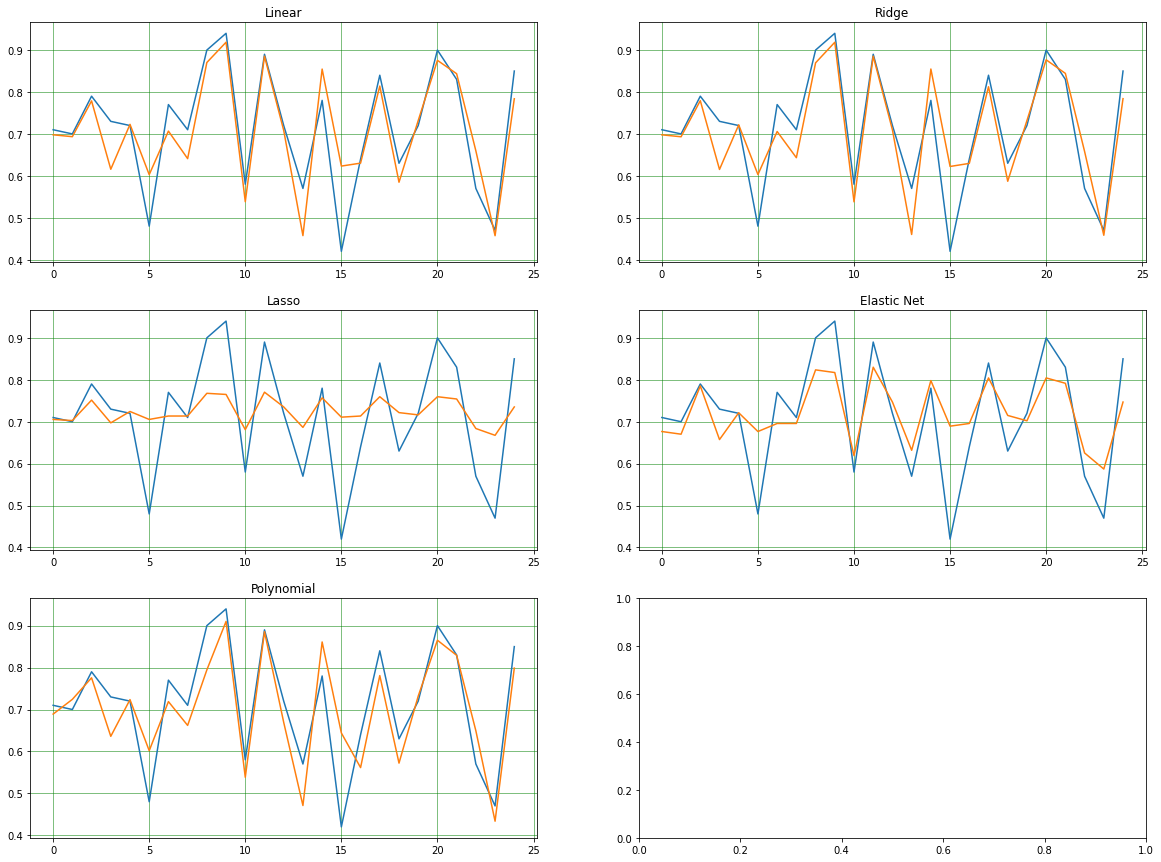

In [9]:
df_1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_A.flatten()}).head(25)
df_2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_B.flatten()}).head(25)
df_3 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_C.flatten()}).head(25)
df_4 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_D.flatten()}).head(25)
df_5 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_E.flatten()}).head(25)


fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20,15))

axes[0,0].plot(df_1)
axes[0,0].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[0,0].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
axes[0,0].set_title('Linear')

axes[0,1].plot(df_2)
axes[0,1].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[0,1].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
axes[0,1].set_title('Ridge')

axes[1,0].plot(df_3)
axes[1,0].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[1,0].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
axes[1,0].set_title('Lasso')

axes[1,1].plot(df_4)
axes[1,1].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[1,1].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
axes[1,1].set_title('Elastic Net')

axes[2,0].plot(df_5)
axes[2,0].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[2,0].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
axes[2,0].set_title('Polynomial')


plt.show()

In [10]:
list1 = [y_pred_E, y_pred_A, y_pred_B, y_pred_C, y_pred_D]
list2 = ['Polynomial', 'Linear', 'Ridge', 'Lasso', 'ElasticNet']
MAE = []
RMSE = []
MSE = []
mean_target = dataset['Chance of Admit '].mean()
for i in list1:
    MAE.append(metrics.mean_absolute_error(y_test, i))
    MSE.append(metrics.mean_squared_error(y_test, i))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, i)))

eval_1 = pd.DataFrame({'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE, 
              'MAE_pct(%)': np.float_(MAE) / mean_target * 100,
              'MSE_pct(%)': np.float_(MSE) / mean_target * 100,
              'RMSE_pct(%)':np.float_(RMSE) / mean_target * 100}, index=list2).sort_values(by='RMSE')
eval_1

,MAE,MSE,RMSE,MAE_pct(%),MSE_pct(%),RMSE_pct(%)
Ridge,0.049890,0.004787,0.069186,6.887576,0.660820,9.551407
Linear,0.050088,0.004805,0.069319,6.914827,0.663375,9.569854
Polynomial,0.051533,0.005289,0.072724,7.114437,0.730133,10.039841
ElasticNet,0.071704,0.009163,0.095724,9.899135,1.265007,13.215152
Lasso,0.088901,0.013260,0.115153,12.273216,1.830625,15.897376


### 1. b) Experiment 2 : Tanpa intervensi dan pemilihan model Lasso, Ridge, Elastic Net dan Polynomial

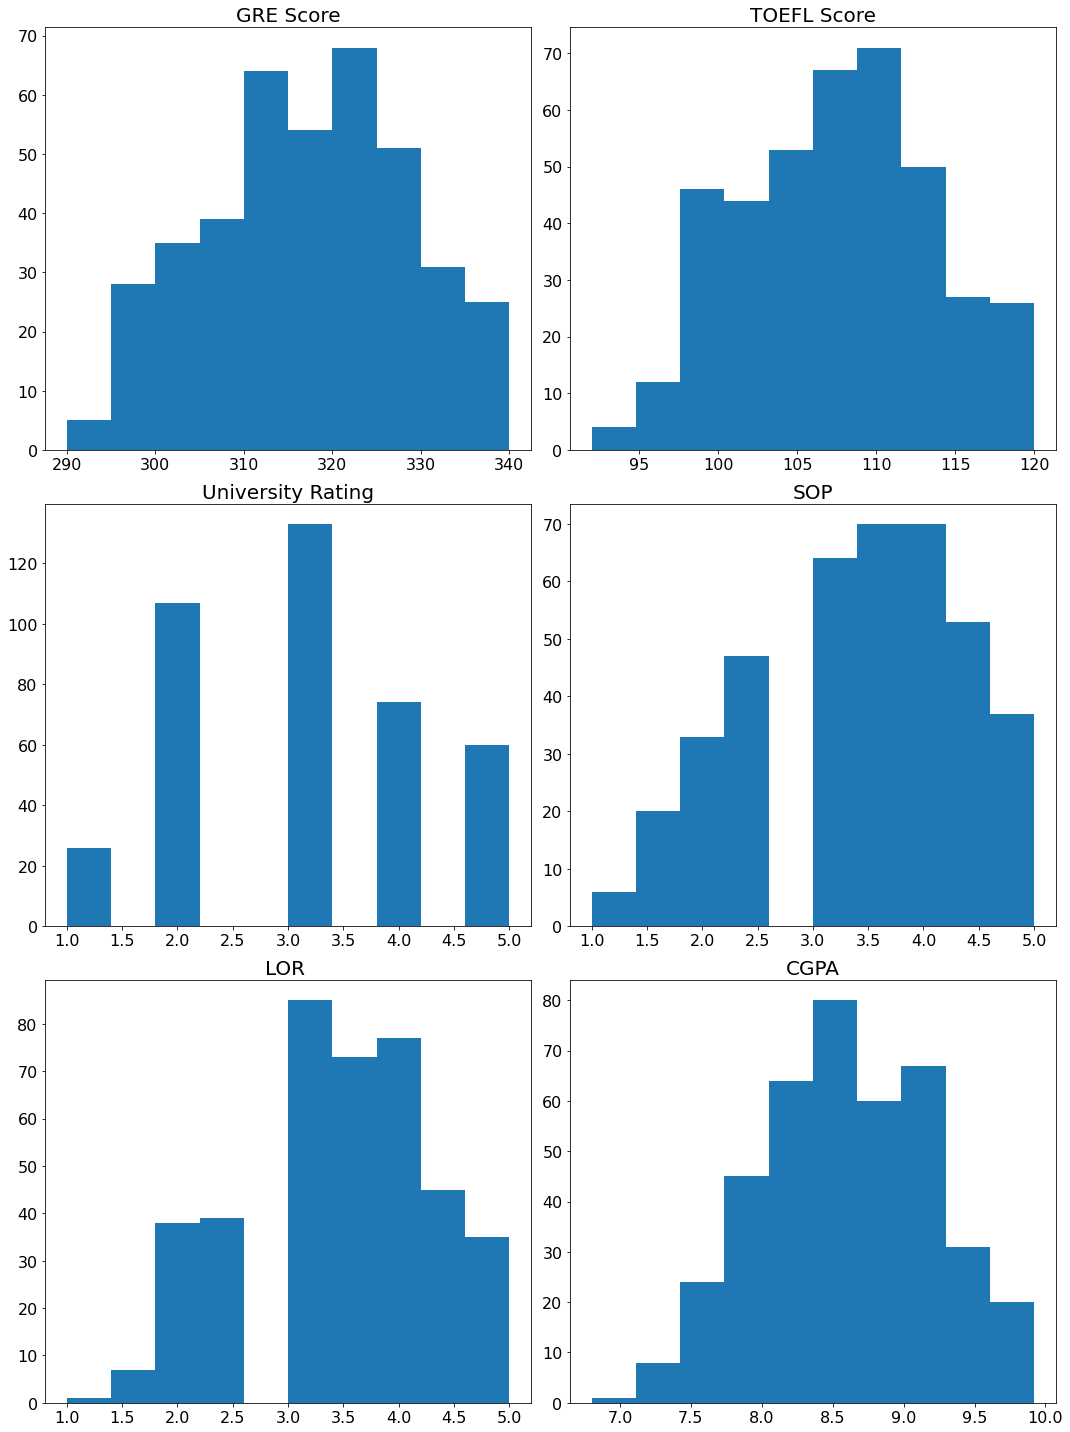

In [11]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15,20))
cols = [['GRE Score', 'TOEFL Score'], 
        ['University Rating','SOP'],
        ['LOR ', 'CGPA'], 
        ['Research']]

for a, num in list(zip(axes, range(1, len(axes)+1))):
    for ax, nu in list(zip(a, range(1, len(axes[num-1])+1))):
        ax.hist(dataset[cols[num-1][nu-1]])
        ax.tick_params(axis='both', labelsize=16)
        ax.set_title(cols[num-1][nu-1], fontsize = 20)
plt.tight_layout()

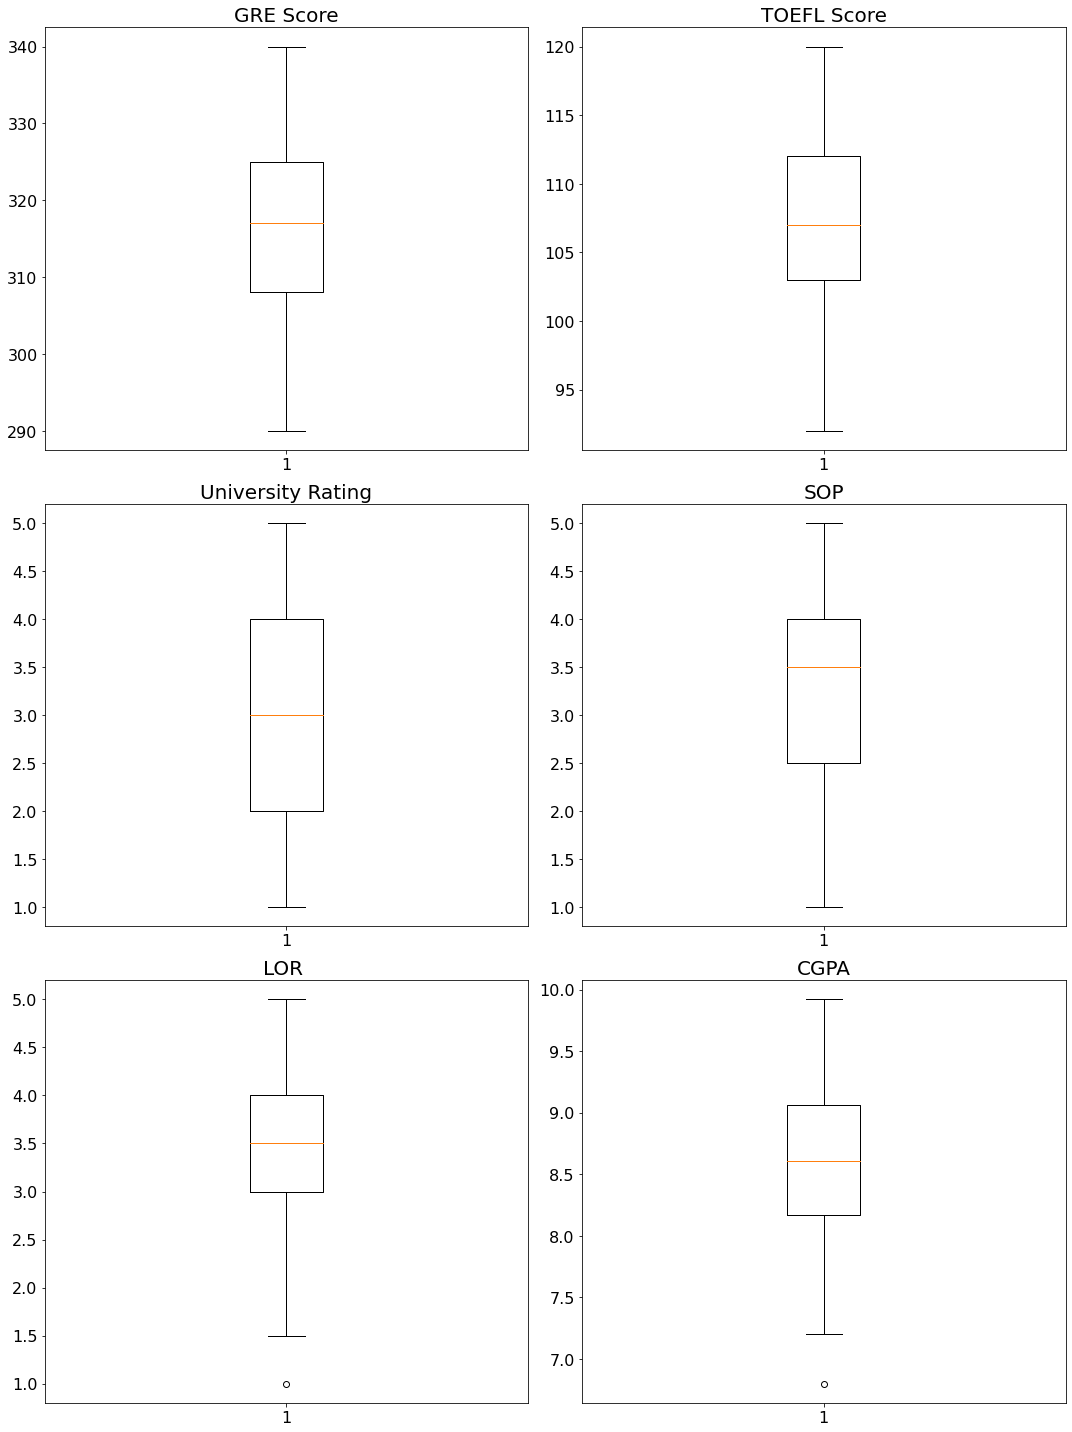

In [12]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15,20))
cols = [['GRE Score', 'TOEFL Score'], 
        ['University Rating','SOP'],
        ['LOR ', 'CGPA'], 
        ['Research']]

for a, num in list(zip(axes, range(1, len(axes)+1))):
    for ax, nu in list(zip(a, range(1, len(axes[num-1])+1))):
        ax.boxplot(dataset[cols[num-1][nu-1]])
        ax.tick_params(axis='both', labelsize=16)
        ax.set_title(cols[num-1][nu-1], fontsize = 20)
plt.tight_layout()

In [13]:
def find_outlier(yourlist):
    outlier = ''
    for i in range(len(yourlist)):
        if yourlist[i] > batas_atas:
            outlier += str(yourlist[i]) + ', '
        if yourlist[i] < batas_bawah:
            outlier += str(yourlist[i]) + ', '
    return outlier

for j in dataset.columns.drop(['Serial No.', 'Chance of Admit ']) :
    Q1 = dataset[j].describe()['25%']
    Q3 = dataset[j].describe()['75%']
    IQR = Q3 - Q1
    batas_bawah= Q1-(1.5*IQR)
    batas_atas = Q3+(1.5*IQR)
    if find_outlier(dataset[j]) == '':
        print('Feature {} has no Outlier'.format(j))
    else:
        print('Feature {} has {} Outlier which is:'.format(j, (len(find_outlier(dataset[j]).split(',')))-1))
        print(find_outlier(dataset[j]))

Feature GRE Score has no Outlier
Feature TOEFL Score has no Outlier
Feature University Rating has no Outlier
Feature SOP has no Outlier
Feature LOR  has 1 Outlier which is:
1.0, 
Feature CGPA has 1 Outlier which is:
6.8, 
Feature Research has no Outlier


In [14]:
dataset_no_out = dataset[(dataset['LOR ']!=1.0) & (dataset['CGPA']!=6.8)]

In [15]:
#splitting feature and target
X_2 = dataset_no_out[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values
y_2 = dataset_no_out[['Chance of Admit ']].values

#Splitting train and test data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=0)

#Training Model
modelA = LinearRegression()
modelB = Ridge()
modelC = Lasso()
modelD = ElasticNet()

modelA.fit(X_train_2, y_train_2)
modelB.fit(X_train_2, y_train_2)
modelC.fit(X_train_2, y_train_2)
modelD.fit(X_train_2, y_train_2)

polyReg = make_pipeline(
    PolynomialFeatures(2, include_bias=False),
    LinearRegression()
)

polyReg.fit(X_train_2, y_train_2)

y_pred_E = polyReg.predict(X_test_2)
y_pred_A = modelA.predict(X_test_2)
y_pred_B = modelB.predict(X_test_2)
y_pred_C = modelC.predict(X_test_2)
y_pred_D = modelD.predict(X_test_2)

#Generate Coefficient DataFrames
X_columns = dataset[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].columns
coeff_df = pd.DataFrame({'Linear': modelA.coef_[0],'Ridge': modelB.coef_[0], 
                         'Lasso': modelC.coef_[0],'ElasticNet': modelD.coef_[0],
                        }, index=X_columns)
coeff_df.sort_values(by='Ridge', ascending=False)

,Linear,Ridge,Lasso,ElasticNet
CGPA,0.108039,0.102863,0.002706,0.006325
Research,0.026039,0.025603,0.002706,0.006325
LOR,0.024234,0.024530,0.002706,0.006325
University Rating,0.007040,0.007336,0.002706,0.006325
TOEFL Score,0.002437,0.002570,0.002706,0.006325
GRE Score,0.002267,0.002382,0.002706,0.006325
SOP,-0.001515,-0.001012,0.002706,0.006325


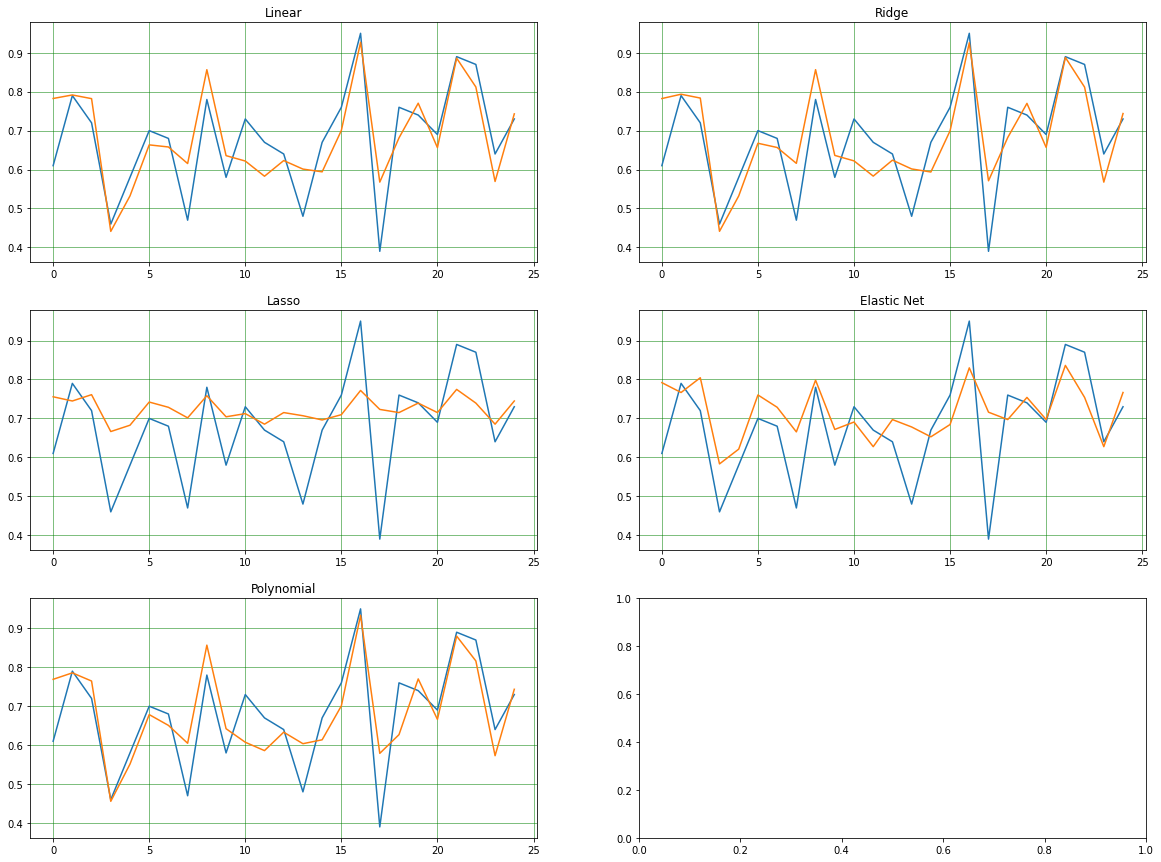

,MAE,MSE,RMSE,MAE_pct(%),MSE_pct(%),RMSE_pct(%)
Polynomial,0.049540,0.004536,0.067349,6.823475,0.624751,9.276327
Linear,0.051760,0.004625,0.068004,7.129146,0.636966,9.366574
Ridge,0.051676,0.004654,0.068220,7.117649,0.641013,9.396282
ElasticNet,0.072678,0.009079,0.095285,10.010314,1.250520,13.124052
Lasso,0.086764,0.012609,0.112288,11.950402,1.736646,15.466010


In [16]:
df_1 = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_pred_A.flatten()}).head(25)
df_2 = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_pred_B.flatten()}).head(25)
df_3 = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_pred_C.flatten()}).head(25)
df_4 = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_pred_D.flatten()}).head(25)
df_5 = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_pred_E.flatten()}).head(25)

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20,15))

axes[0,0].plot(df_1)
axes[0,0].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[0,0].set_title('Linear')

axes[0,1].plot(df_2)
axes[0,1].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[0,1].set_title('Ridge')

axes[1,0].plot(df_3)
axes[1,0].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[1,0].set_title('Lasso')

axes[1,1].plot(df_4)
axes[1,1].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[1,1].set_title('Elastic Net')

axes[2,0].plot(df_5)
axes[2,0].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[2,0].set_title('Polynomial')
plt.show()
list1 = [y_pred_E, y_pred_A, y_pred_B, y_pred_C, y_pred_D]
list2 = ['Polynomial', 'Linear', 'Ridge', 'Lasso', 'ElasticNet']
MAE = []
RMSE = []
MSE = []
mean_target = dataset_no_out['Chance of Admit '].mean()
for i in list1:
    MAE.append(metrics.mean_absolute_error(y_test_2, i))
    MSE.append(metrics.mean_squared_error(y_test_2, i))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_2, i)))

eval_2 = pd.DataFrame({'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE, 
              'MAE_pct(%)': np.float_(MAE) / mean_target * 100,
              'MSE_pct(%)': np.float_(MSE) / mean_target * 100,
              'RMSE_pct(%)':np.float_(RMSE) / mean_target * 100}, index=list2).sort_values(by='RMSE')
eval_2

In [17]:
list1 = [y_pred_E, y_pred_A, y_pred_B, y_pred_C, y_pred_D]
list2 = ['Polynomial', 'Linear', 'Ridge', 'Lasso', 'ElasticNet']
MAE = []
RMSE = []
MSE = []
mean_target = dataset_no_out['Chance of Admit '].mean()
for i in list1:
    MAE.append(metrics.mean_absolute_error(y_test_2, i))
    MSE.append(metrics.mean_squared_error(y_test_2, i))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_2, i)))

eval_2 = pd.DataFrame({'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE, 
              'MAE_pct(%)': np.float_(MAE) / mean_target * 100,
              'MSE_pct(%)': np.float_(MSE) / mean_target * 100,
              'RMSE_pct(%)':np.float_(RMSE) / mean_target * 100}, index=list2).sort_values(by='RMSE')
eval_2

,MAE,MSE,RMSE,MAE_pct(%),MSE_pct(%),RMSE_pct(%)
Polynomial,0.049540,0.004536,0.067349,6.823475,0.624751,9.276327
Linear,0.051760,0.004625,0.068004,7.129146,0.636966,9.366574
Ridge,0.051676,0.004654,0.068220,7.117649,0.641013,9.396282
ElasticNet,0.072678,0.009079,0.095285,10.010314,1.250520,13.124052
Lasso,0.086764,0.012609,0.112288,11.950402,1.736646,15.466010


### 1. c) Experiment 3 : Tanpa intervensi dan pemilihan model Lasso, Ridge, Elastic Net dan Polynomial

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer, Binarizer
#Scalling Features with no Outliers
for i in dataset_no_out.columns.drop(['Chance of Admit ', 'Serial No.']):
    dataset_no_out['{} MinMax scl'.format(i)] = MinMaxScaler().fit_transform(dataset_no_out[[i]])
axes[2,0].set_title('Polynomial')

dataset_no_out

<ipython-input-18-bee1ca7f309e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_no_out['{} MinMax scl'.format(i)] = MinMaxScaler().fit_transform(dataset_no_out[[i]])
<ipython-input-18-bee1ca7f309e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_no_out['{} MinMax scl'.format(i)] = MinMaxScaler().fit_transform(dataset_no_out[[i]])
<ipython-input-18-bee1ca7f309e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GRE Score MinMax scl,TOEFL Score MinMax scl,University Rating MinMax scl,SOP MinMax scl,LOR MinMax scl,CGPA MinMax scl,Research MinMax scl
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.94,0.928571,0.75,0.875,0.857143,0.900735,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.68,0.535714,0.75,0.750,0.857143,0.613971,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.52,0.428571,0.50,0.500,0.571429,0.294118,1.0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.64,0.642857,0.50,0.625,0.285714,0.540441,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.48,0.392857,0.25,0.250,0.428571,0.371324,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,0.68,0.642857,0.50,0.625,0.571429,0.676471,1.0
396,397,325,107,3,3.0,3.5,9.11,1,0.84,0.70,0.535714,0.50,0.500,0.571429,0.702206,1.0
397,398,330,116,4,5.0,4.5,9.45,1,0.91,0.80,0.857143,0.75,1.000,0.857143,0.827206,1.0
398,399,312,103,3,3.5,4.0,8.78,0,0.67,0.44,0.392857,0.50,0.625,0.714286,0.580882,0.0


In [19]:
dataset_scaled = dataset_no_out[['GRE Score MinMax scl', 'TOEFL Score MinMax scl',
                                 'University Rating MinMax scl', 'SOP MinMax scl',
                                 'Research MinMax scl', 'LOR  MinMax scl', 'CGPA MinMax scl', 'Chance of Admit ']]
#splitting feature and target
X_3 = dataset_scaled[['GRE Score MinMax scl', 'TOEFL Score MinMax scl',
                      'University Rating MinMax scl', 'SOP MinMax scl',
                      'Research MinMax scl', 'LOR  MinMax scl', 'CGPA MinMax scl']].values
y_3 = dataset_scaled[['Chance of Admit ']].values

#Splitting train and test data
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=0)

#Training Model
modelA = LinearRegression()
modelB = Ridge()
modelC = Lasso()
modelD = ElasticNet()

modelA.fit(X_train_3, y_train_3)
modelB.fit(X_train_3, y_train_3)
modelC.fit(X_train_3, y_train_3)
modelD.fit(X_train_3, y_train_3)

polyReg = make_pipeline(
    PolynomialFeatures(2, include_bias=False),
    LinearRegression()
)

polyReg.fit(X_train_3, y_train_3)

y_pred_E = polyReg.predict(X_test_3)
y_pred_A = modelA.predict(X_test_3)
y_pred_B = modelB.predict(X_test_3)
y_pred_C = modelC.predict(X_test_3)
y_pred_D = modelD.predict(X_test_3)

#Generate Coefficient DataFrames
X_columns = dataset[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].columns
coeff_df = pd.DataFrame({'Linear': modelA.coef_[0],'Ridge': modelB.coef_[0], 
                         'Lasso': modelC.coef_[0],'ElasticNet': modelD.coef_[0],
                        }, index=X_columns)
coeff_df.sort_values(by='Ridge', ascending=False)

,Linear,Ridge,Lasso,ElasticNet
Research,0.293865,0.234825,0.0,0.0
GRE Score,0.113337,0.122095,0.0,0.0
CGPA,0.084820,0.084500,0.0,0.0
TOEFL Score,0.068235,0.082480,0.0,0.0
University Rating,0.028160,0.036601,0.0,0.0
LOR,0.026039,0.028543,0.0,0.0
SOP,-0.006060,0.008480,0.0,0.0


In [20]:
list1 = [y_pred_E, y_pred_A, y_pred_B, y_pred_C, y_pred_D]
list2 = ['Polynomial', 'Linear', 'Ridge', 'Lasso', 'ElasticNet']
MAE = []
RMSE = []
MSE = []
mean_target = dataset_no_out['Chance of Admit '].mean()
for i in list1:
    MAE.append(metrics.mean_absolute_error(y_test_3, i))
    MSE.append(metrics.mean_squared_error(y_test_3, i))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_3, i)))

eval_3 = pd.DataFrame({'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE,
              'MAE_pct(%)': np.float_(MAE) / mean_target * 100,
              'MSE_pct(%)': np.float_(MSE) / mean_target * 100,
              'RMSE_pct(%)':np.float_(RMSE) / mean_target * 100}, index=list2).sort_values(by='RMSE')
eval_3

,MAE,MSE,RMSE,MAE_pct(%),MSE_pct(%),RMSE_pct(%)
Polynomial,0.049540,0.004536,0.067349,6.823475,0.624751,9.276327
Linear,0.051760,0.004625,0.068004,7.129146,0.636966,9.366574
Ridge,0.051878,0.004760,0.068996,7.145485,0.655685,9.503211
Lasso,0.102914,0.017017,0.130448,14.174828,2.343792,17.967274
ElasticNet,0.102914,0.017017,0.130448,14.174828,2.343792,17.967274


In [21]:
eval_2

,MAE,MSE,RMSE,MAE_pct(%),MSE_pct(%),RMSE_pct(%)
Polynomial,0.049540,0.004536,0.067349,6.823475,0.624751,9.276327
Linear,0.051760,0.004625,0.068004,7.129146,0.636966,9.366574
Ridge,0.051676,0.004654,0.068220,7.117649,0.641013,9.396282
ElasticNet,0.072678,0.009079,0.095285,10.010314,1.250520,13.124052
Lasso,0.086764,0.012609,0.112288,11.950402,1.736646,15.466010


### 2. a) Experiment 4 : Tanpa intervensi dan pemilihan model Lasso, Ridge, Elastic Net dan Polynomial

In [22]:
#splitting feature and target
X_4 = dataset[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values
y_4 = dataset[['Chance of Admit ']].values

#Splitting train and test data
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.1, random_state=0)

#Training Model
modelA = LinearRegression()
modelB = Ridge()
modelC = Lasso()
modelD = ElasticNet()

modelA.fit(X_train_4, y_train_4)
modelB.fit(X_train_4, y_train_4)
modelC.fit(X_train_4, y_train_4)
modelD.fit(X_train_4, y_train_4)

polyReg = make_pipeline(
    PolynomialFeatures(2, include_bias=False),
    LinearRegression()
)

polyReg.fit(X_train, y_train)

y_pred_E = polyReg.predict(X_test_4)
y_pred_A = modelA.predict(X_test_4)
y_pred_B = modelB.predict(X_test_4)
y_pred_C = modelC.predict(X_test_4)
y_pred_D = modelD.predict(X_test_4)

#Generate Coefficient DataFrames
X_columns = dataset[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].columns
coeff_df = pd.DataFrame({'Linear': modelA.coef_[0],'Ridge': modelB.coef_[0], 
                         'Lasso': modelC.coef_[0],'ElasticNet': modelD.coef_[0],
                        }, index=X_columns)
coeff_df.sort_values(by='Ridge', ascending=False)

,Linear,Ridge,Lasso,ElasticNet
CGPA,0.121433,0.116930,0.002427,0.006203
LOR,0.021469,0.021736,0.002427,0.006203
Research,0.021451,0.021182,0.002427,0.006203
University Rating,0.007823,0.008081,0.002427,0.006203
TOEFL Score,0.002781,0.002893,0.002427,0.006203
GRE Score,0.001844,0.001942,0.002427,0.006203
SOP,-0.005379,-0.004901,0.002427,0.006203


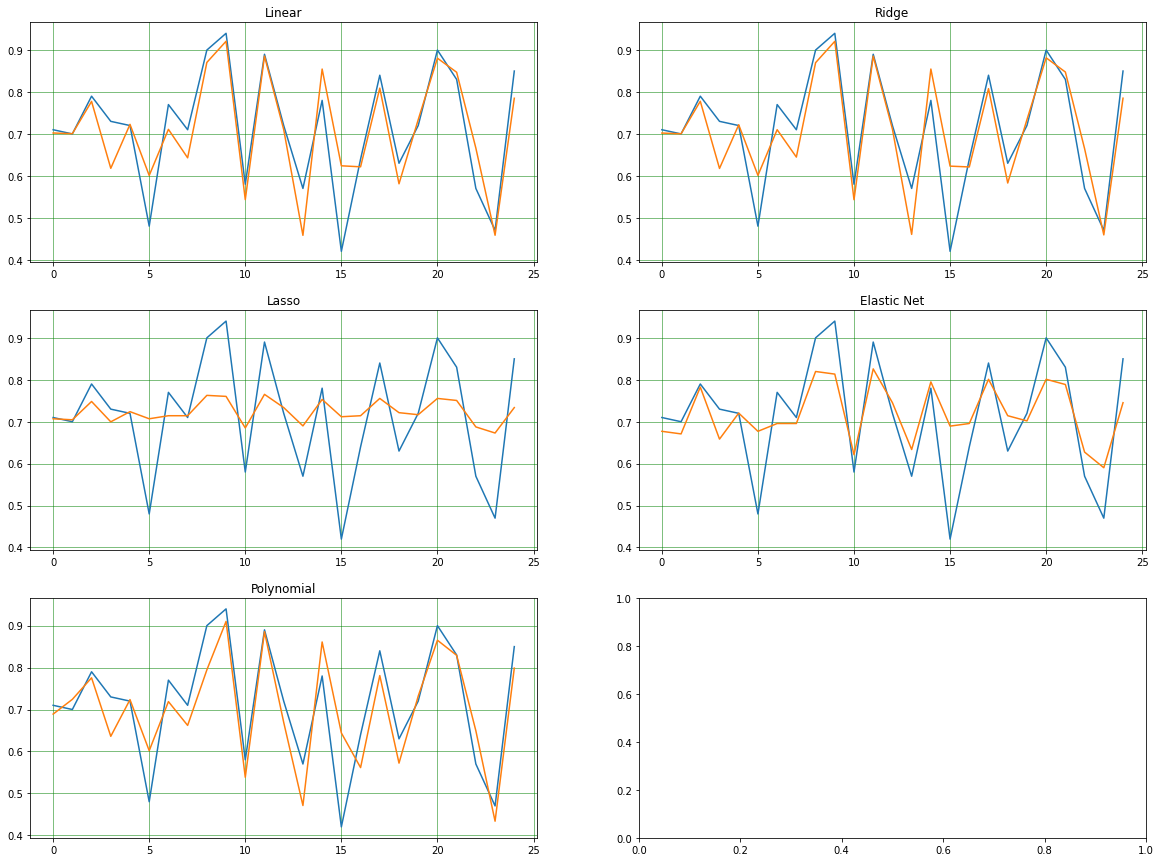

In [23]:
df_1 = pd.DataFrame({'Actual': y_test_4.flatten(), 'Predicted': y_pred_A.flatten()}).head(25)
df_2 = pd.DataFrame({'Actual': y_test_4.flatten(), 'Predicted': y_pred_B.flatten()}).head(25)
df_3 = pd.DataFrame({'Actual': y_test_4.flatten(), 'Predicted': y_pred_C.flatten()}).head(25)
df_4 = pd.DataFrame({'Actual': y_test_4.flatten(), 'Predicted': y_pred_D.flatten()}).head(25)
df_5 = pd.DataFrame({'Actual': y_test_4.flatten(), 'Predicted': y_pred_E.flatten()}).head(25)


fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20,15))

axes[0,0].plot(df_1)
axes[0,0].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[0,0].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
axes[0,0].set_title('Linear')

axes[0,1].plot(df_2)
axes[0,1].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[0,1].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
axes[0,1].set_title('Ridge')

axes[1,0].plot(df_3)
axes[1,0].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[1,0].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
axes[1,0].set_title('Lasso')

axes[1,1].plot(df_4)
axes[1,1].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[1,1].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
axes[1,1].set_title('Elastic Net')

axes[2,0].plot(df_5)
axes[2,0].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[2,0].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
axes[2,0].set_title('Polynomial')


plt.show()

In [24]:
list1 = [y_pred_E, y_pred_A, y_pred_B, y_pred_C, y_pred_D]
list2 = ['Polynomial', 'Linear', 'Ridge', 'Lasso', 'ElasticNet']
MAE = []
RMSE = []
MSE = []
mean_target = dataset['Chance of Admit '].mean()
for i in list1:
    MAE.append(metrics.mean_absolute_error(y_test_4, i))
    MSE.append(metrics.mean_squared_error(y_test_4, i))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_4, i)))

eval_4 = pd.DataFrame({'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE, 
              'MAE_pct(%)': np.float_(MAE) / mean_target * 100,
              'MSE_pct(%)': np.float_(MSE) / mean_target * 100,
              'RMSE_pct(%)':np.float_(RMSE) / mean_target * 100}, index=list2).sort_values(by='RMSE')
eval_4

,MAE,MSE,RMSE,MAE_pct(%),MSE_pct(%),RMSE_pct(%)
Ridge,0.050950,0.005278,0.072649,7.033929,0.728632,10.029512
Linear,0.050936,0.005291,0.072736,7.031996,0.730386,10.041577
Polynomial,0.055040,0.005673,0.075322,7.598580,0.783248,10.398614
ElasticNet,0.076090,0.009456,0.097244,10.504539,1.305512,13.425059
Lasso,0.093656,0.014526,0.120524,12.929596,2.005388,16.638913


In [25]:
eval_1

,MAE,MSE,RMSE,MAE_pct(%),MSE_pct(%),RMSE_pct(%)
Ridge,0.049890,0.004787,0.069186,6.887576,0.660820,9.551407
Linear,0.050088,0.004805,0.069319,6.914827,0.663375,9.569854
Polynomial,0.051533,0.005289,0.072724,7.114437,0.730133,10.039841
ElasticNet,0.071704,0.009163,0.095724,9.899135,1.265007,13.215152
Lasso,0.088901,0.013260,0.115153,12.273216,1.830625,15.897376


### 2. b) Experiment 5 : Tanpa intervensi dan pemilihan model Lasso, Ridge, Elastic Net dan Polynomial

In [26]:
dataset_no_out = dataset[(dataset['LOR ']!=1.0) & (dataset['CGPA']!=6.8)]

In [27]:
#splitting feature and target
X_5 = dataset_no_out[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values
y_5 = dataset_no_out[['Chance of Admit ']].values

#Splitting train and test data
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.1, random_state=0)

#Training Model
modelA = LinearRegression()
modelB = Ridge()
modelC = Lasso()
modelD = ElasticNet()

modelA.fit(X_train_5, y_train_5)
modelB.fit(X_train_5, y_train_5)
modelC.fit(X_train_5, y_train_5)
modelD.fit(X_train_5, y_train_5)

polyReg = make_pipeline(
    PolynomialFeatures(2, include_bias=False),
    LinearRegression()
)

polyReg.fit(X_train_5, y_train_5)

y_pred_E = polyReg.predict(X_test_5)
y_pred_A = modelA.predict(X_test_5)
y_pred_B = modelB.predict(X_test_5)
y_pred_C = modelC.predict(X_test_5)
y_pred_D = modelD.predict(X_test_5)

#Generate Coefficient DataFrames
X_columns = dataset[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].columns
coeff_df = pd.DataFrame({'Linear': modelA.coef_[0],'Ridge': modelB.coef_[0], 
                         'Lasso': modelC.coef_[0],'ElasticNet': modelD.coef_[0],
                        }, index=X_columns)
coeff_df.sort_values(by='Ridge', ascending=False)

,Linear,Ridge,Lasso,ElasticNet
CGPA,0.107017,0.102750,0.002422,0.006131
LOR,0.023704,0.023956,0.002422,0.006131
Research,0.022925,0.022618,0.002422,0.006131
University Rating,0.005915,0.006198,0.002422,0.006131
TOEFL Score,0.002801,0.002913,0.002422,0.006131
GRE Score,0.002242,0.002331,0.002422,0.006131
SOP,-0.002307,-0.001901,0.002422,0.006131


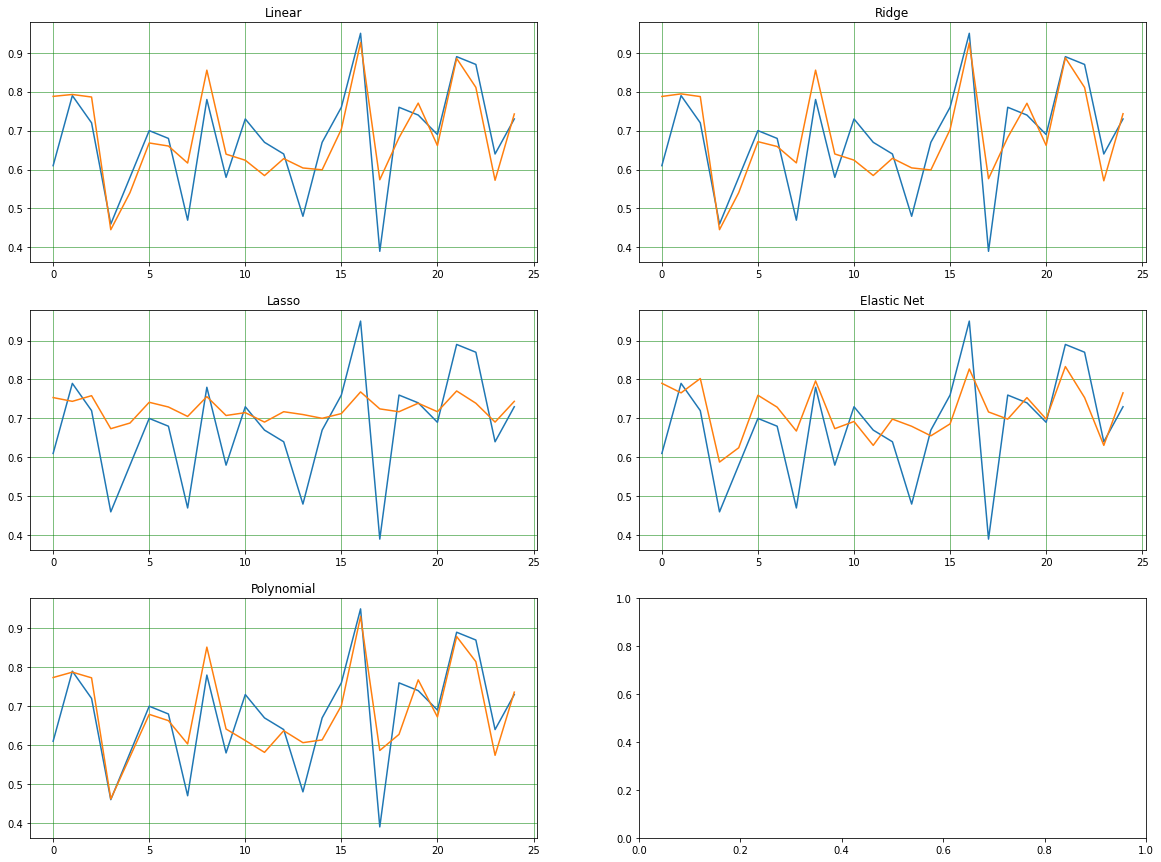

In [28]:
df_1 = pd.DataFrame({'Actual': y_test_5.flatten(), 'Predicted': y_pred_A.flatten()}).head(25)
df_2 = pd.DataFrame({'Actual': y_test_5.flatten(), 'Predicted': y_pred_B.flatten()}).head(25)
df_3 = pd.DataFrame({'Actual': y_test_5.flatten(), 'Predicted': y_pred_C.flatten()}).head(25)
df_4 = pd.DataFrame({'Actual': y_test_5.flatten(), 'Predicted': y_pred_D.flatten()}).head(25)
df_5 = pd.DataFrame({'Actual': y_test_5.flatten(), 'Predicted': y_pred_E.flatten()}).head(25)

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20,15))

axes[0,0].plot(df_1)
axes[0,0].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[0,0].set_title('Linear')

axes[0,1].plot(df_2)
axes[0,1].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[0,1].set_title('Ridge')

axes[1,0].plot(df_3)
axes[1,0].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[1,0].set_title('Lasso')

axes[1,1].plot(df_4)
axes[1,1].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[1,1].set_title('Elastic Net')

axes[2,0].plot(df_5)
axes[2,0].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[2,0].set_title('Polynomial')
plt.show()

In [29]:
list1 = [y_pred_E, y_pred_A, y_pred_B, y_pred_C, y_pred_D]
list2 = ['Polynomial', 'Linear', 'Ridge', 'Lasso', 'ElasticNet']
MAE = []
RMSE = []
MSE = []
mean_target = dataset_no_out['Chance of Admit '].mean()
for i in list1:
    MAE.append(metrics.mean_absolute_error(y_test_5, i))
    MSE.append(metrics.mean_squared_error(y_test_5, i))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_5, i)))

eval_5 = pd.DataFrame({'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE, 
              'MAE_pct(%)': np.float_(MAE) / mean_target * 100,
              'MSE_pct(%)': np.float_(MSE) / mean_target * 100,
              'RMSE_pct(%)':np.float_(RMSE) / mean_target * 100}, index=list2).sort_values(by='RMSE')
eval_5

,MAE,MSE,RMSE,MAE_pct(%),MSE_pct(%),RMSE_pct(%)
Polynomial,0.052055,0.004999,0.070704,7.169867,0.688556,9.738507
Linear,0.055835,0.005336,0.073050,7.690484,0.734993,10.061534
Ridge,0.056056,0.005394,0.073445,7.720943,0.742969,10.115982
ElasticNet,0.079780,0.011072,0.105223,10.988579,1.524988,14.492918
Lasso,0.091753,0.015060,0.122721,12.637608,2.074355,16.903015


In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer, Binarizer
#Scalling Features with no Outliers
for i in dataset_no_out.columns.drop(['Chance of Admit ', 'Serial No.']):
    dataset_no_out['{} MinMax scl'.format(i)] = MinMaxScaler().fit_transform(dataset_no_out[[i]])
axes[2,0].set_title('Polynomial')

dataset_no_out

<ipython-input-31-bee1ca7f309e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_no_out['{} MinMax scl'.format(i)] = MinMaxScaler().fit_transform(dataset_no_out[[i]])
<ipython-input-31-bee1ca7f309e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_no_out['{} MinMax scl'.format(i)] = MinMaxScaler().fit_transform(dataset_no_out[[i]])
<ipython-input-31-bee1ca7f309e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GRE Score MinMax scl,TOEFL Score MinMax scl,University Rating MinMax scl,SOP MinMax scl,LOR MinMax scl,CGPA MinMax scl,Research MinMax scl
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.94,0.928571,0.75,0.875,0.857143,0.900735,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.68,0.535714,0.75,0.750,0.857143,0.613971,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.52,0.428571,0.50,0.500,0.571429,0.294118,1.0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.64,0.642857,0.50,0.625,0.285714,0.540441,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.48,0.392857,0.25,0.250,0.428571,0.371324,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,0.68,0.642857,0.50,0.625,0.571429,0.676471,1.0
396,397,325,107,3,3.0,3.5,9.11,1,0.84,0.70,0.535714,0.50,0.500,0.571429,0.702206,1.0
397,398,330,116,4,5.0,4.5,9.45,1,0.91,0.80,0.857143,0.75,1.000,0.857143,0.827206,1.0
398,399,312,103,3,3.5,4.0,8.78,0,0.67,0.44,0.392857,0.50,0.625,0.714286,0.580882,0.0


In [32]:
dataset_scaled = dataset_no_out[['GRE Score MinMax scl', 'TOEFL Score MinMax scl',
                                 'University Rating MinMax scl', 'SOP MinMax scl',
                                 'Research MinMax scl', 'LOR  MinMax scl', 'CGPA MinMax scl', 'Chance of Admit ']]
#splitting feature and target
X_6 = dataset_scaled[['GRE Score MinMax scl', 'TOEFL Score MinMax scl',
                      'University Rating MinMax scl', 'SOP MinMax scl',
                      'Research MinMax scl', 'LOR  MinMax scl', 'CGPA MinMax scl']].values
y_6 = dataset_scaled[['Chance of Admit ']].values

#Splitting train and test data
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, y_6, test_size=0.1, random_state=0)

#Training Model
modelA = LinearRegression()
modelB = Ridge()
modelC = Lasso()
modelD = ElasticNet()

modelA.fit(X_train_6, y_train_6)
modelB.fit(X_train_6, y_train_6)
modelC.fit(X_train_6, y_train_6)
modelD.fit(X_train_6, y_train_6)

polyReg = make_pipeline(
    PolynomialFeatures(2, include_bias=False),
    LinearRegression()
)

polyReg.fit(X_train_6, y_train_6)

y_pred_E = polyReg.predict(X_test_6)
y_pred_A = modelA.predict(X_test_6)
y_pred_B = modelB.predict(X_test_6)
y_pred_C = modelC.predict(X_test_6)
y_pred_D = modelD.predict(X_test_6)

#Generate Coefficient DataFrames
X_columns = dataset[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].columns
coeff_df = pd.DataFrame({'Linear': modelA.coef_[0],'Ridge': modelB.coef_[0], 
                         'Lasso': modelC.coef_[0],'ElasticNet': modelD.coef_[0],
                        }, index=X_columns)
coeff_df.sort_values(by='Ridge', ascending=False)

,Linear,Ridge,Lasso,ElasticNet
Research,0.291087,0.240200,0.0,0.0
GRE Score,0.112086,0.119503,0.0,0.0
TOEFL Score,0.078422,0.088897,0.0,0.0
CGPA,0.082964,0.082890,0.0,0.0
University Rating,0.023662,0.031845,0.0,0.0
LOR,0.022925,0.025051,0.0,0.0
SOP,-0.009229,0.003742,0.0,0.0


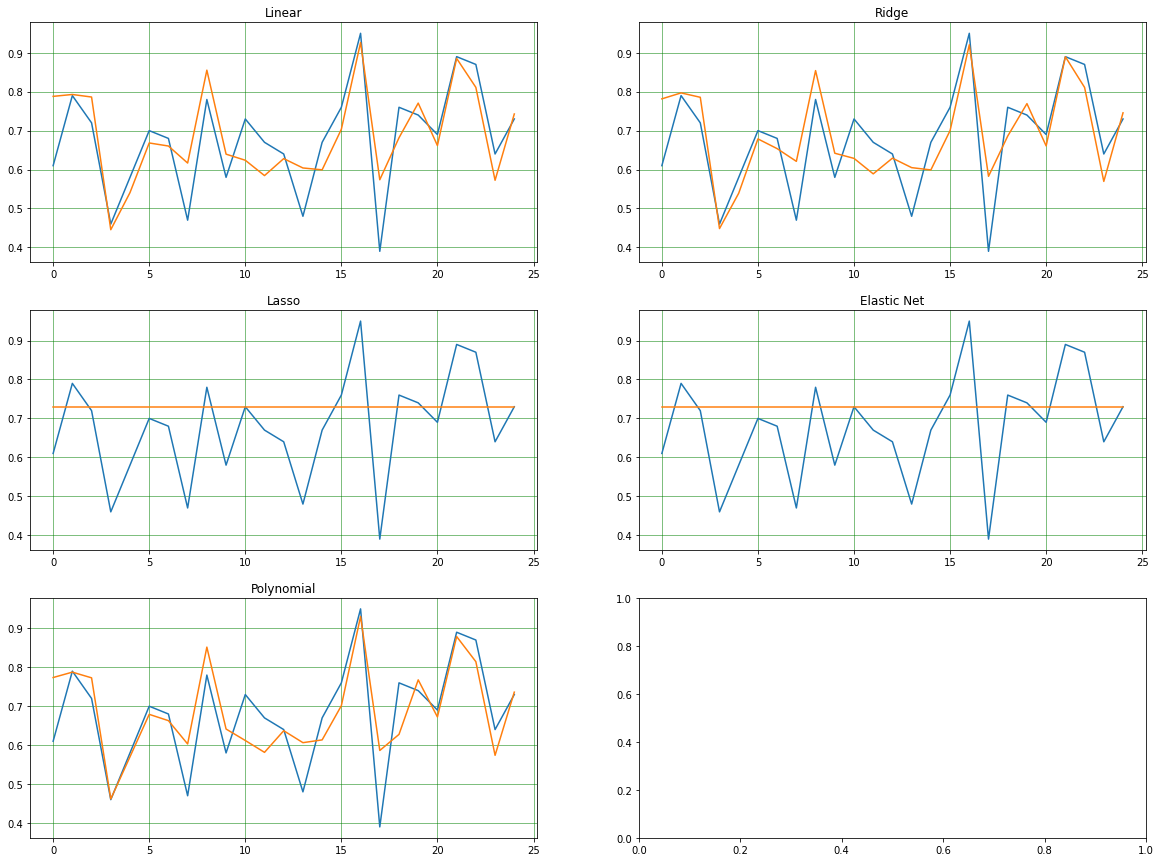

In [33]:
df_1 = pd.DataFrame({'Actual': y_test_6.flatten(), 'Predicted': y_pred_A.flatten()}).head(25)
df_2 = pd.DataFrame({'Actual': y_test_6.flatten(), 'Predicted': y_pred_B.flatten()}).head(25)
df_3 = pd.DataFrame({'Actual': y_test_6.flatten(), 'Predicted': y_pred_C.flatten()}).head(25)
df_4 = pd.DataFrame({'Actual': y_test_6.flatten(), 'Predicted': y_pred_D.flatten()}).head(25)
df_5 = pd.DataFrame({'Actual': y_test_6.flatten(), 'Predicted': y_pred_E.flatten()}).head(25)

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20,15))

axes[0,0].plot(df_1)
axes[0,0].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[0,0].set_title('Linear')

axes[0,1].plot(df_2)
axes[0,1].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[0,1].set_title('Ridge')

axes[1,0].plot(df_3)
axes[1,0].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[1,0].set_title('Lasso')

axes[1,1].plot(df_4)
axes[1,1].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[1,1].set_title('Elastic Net')

axes[2,0].plot(df_5)
axes[2,0].grid(which='major', linestyle='-', linewidth='0.5', color='green')
axes[2,0].set_title('Polynomial')
plt.show()

In [34]:
list1 = [y_pred_E, y_pred_A, y_pred_B, y_pred_C, y_pred_D]
list2 = ['Polynomial', 'Linear', 'Ridge', 'Lasso', 'ElasticNet']
MAE = []
RMSE = []
MSE = []
mean_target = dataset_no_out['Chance of Admit '].mean()
for i in list1:
    MAE.append(metrics.mean_absolute_error(y_test_6, i))
    MSE.append(metrics.mean_squared_error(y_test_6, i))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_6, i)))

eval_6 = pd.DataFrame({'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE,
              'MAE_pct(%)': np.float_(MAE) / mean_target * 100,
              'MSE_pct(%)': np.float_(MSE) / mean_target * 100,
              'RMSE_pct(%)':np.float_(RMSE) / mean_target * 100}, index=list2).sort_values(by='RMSE')
eval_6

,MAE,MSE,RMSE,MAE_pct(%),MSE_pct(%),RMSE_pct(%)
Polynomial,0.052055,0.004999,0.070704,7.169867,0.688556,9.738507
Linear,0.055835,0.005336,0.073050,7.690484,0.734993,10.061534
Ridge,0.056809,0.005551,0.074505,7.824636,0.764559,10.261910
Lasso,0.103961,0.019142,0.138355,14.319088,2.636529,19.056317
ElasticNet,0.103961,0.019142,0.138355,14.319088,2.636529,19.056317


In [35]:
eval_3

,MAE,MSE,RMSE,MAE_pct(%),MSE_pct(%),RMSE_pct(%)
Polynomial,0.049540,0.004536,0.067349,6.823475,0.624751,9.276327
Linear,0.051760,0.004625,0.068004,7.129146,0.636966,9.366574
Ridge,0.051878,0.004760,0.068996,7.145485,0.655685,9.503211
Lasso,0.102914,0.017017,0.130448,14.174828,2.343792,17.967274
ElasticNet,0.102914,0.017017,0.130448,14.174828,2.343792,17.967274


In [36]:
eval_all = [eval_1, eval_2, eval_3, eval_4, eval_5, eval_6]
eval_all_list = ['eval_1', 'eval_2', 'eval_3', 'eval_4', 'eval_5', 'eval_6']
final = pd.concat(eval_all, keys=eval_all_list)
final

MAE       MSE      RMSE  MAE_pct(%)  MSE_pct(%)  \
eval_1 Ridge       0.049890  0.004787  0.069186    6.887576    0.660820   
       Linear      0.050088  0.004805  0.069319    6.914827    0.663375   
       Polynomial  0.051533  0.005289  0.072724    7.114437    0.730133   
       ElasticNet  0.071704  0.009163  0.095724    9.899135    1.265007   
       Lasso       0.088901  0.013260  0.115153   12.273216    1.830625   
eval_2 Polynomial  0.049540  0.004536  0.067349    6.823475    0.624751   
       Linear      0.051760  0.004625  0.068004    7.129146    0.636966   
       Ridge       0.051676  0.004654  0.068220    7.117649    0.641013   
       ElasticNet  0.072678  0.009079  0.095285   10.010314    1.250520   
       Lasso       0.086764  0.012609  0.112288   11.950402    1.736646   
eval_3 Polynomial  0.049540  0.004536  0.067349    6.823475    0.624751   
       Linear      0.051760  0.004625  0.068004    7.129146    0.636966   
       Ridge       0.051878  0.004760  0.068996    7.145485    0.655685   
       Lasso       0.102914  0.017017  0.130448   14.174828    2.343792   
       ElasticNet  0.102914  0.017017  0.130448   14.174828    2.343792   
eval_4 Ridge       0.050950  0.005278  0.072649    7.033929    0.728632   
       Linear      0.050936  0.005291  0.072736    7.031996    0.730386   
       Polynomial  0.055040  0.005673  0.075322    7.598580    0.783248   
       ElasticNet  0.076090  0.009456  0.097244   10.504539    1.305512   
       Lasso       0.093656  0.014526  0.120524   12.929596    2.005388   
eval_5 Polynomial  0.052055  0.004999  0.070704    7.169867    0.688556   
       Linear      0.055835  0.005336  0.073050    7.690484    0.734993   
       Ridge       0.056056  0.005394  0.073445    7.720943    0.742969   
       ElasticNet  0.079780  0.011072  0.105223   10.988579    1.524988   
       Lasso       0.091753  0.015060  0.122721   12.637608    2.074355   
eval_6 Polynomial  0.052055  0.004999  0.070704    7.169867    0.688556   
       Linear      0.055835  0.005336  0.073050    7.690484    0.734993   
       Ridge       0.056809  0.005551  0.074505    7.824636    0.764559   
       Lasso       0.103961  0.019142  0.138355   14.319088    2.636529   
       ElasticNet  0.103961  0.019142  0.138355   14.319088    2.636529   

                   RMSE_pct(%)  
eval_1 Ridge          9.551407  
       Linear         9.569854  
       Polynomial    10.039841  
       ElasticNet    13.215152  
       Lasso         15.897376  
eval_2 Polynomial     9.276327  
       Linear         9.366574  
       Ridge          9.396282  
       ElasticNet    13.124052  
       Lasso         15.466010  
eval_3 Polynomial     9.276327  
       Linear         9.366574  
       Ridge          9.503211  
       Lasso         17.967274  
       ElasticNet    17.967274  
eval_4 Ridge         10.029512  
       Linear        10.041577  
       Polynomial    10.398614  
       ElasticNet    13.425059  
       Lasso         16.638913  
eval_5 Polynomial     9.738507  
       Linear        10.061534  
       Ridge         10.115982  
       ElasticNet    14.492918  
       Lasso         16.903015  
eval_6 Polynomial     9.738507  
       Linear        10.061534  
       Ridge         10.261910  
       Lasso         19.056317  
       ElasticNet    19.056317